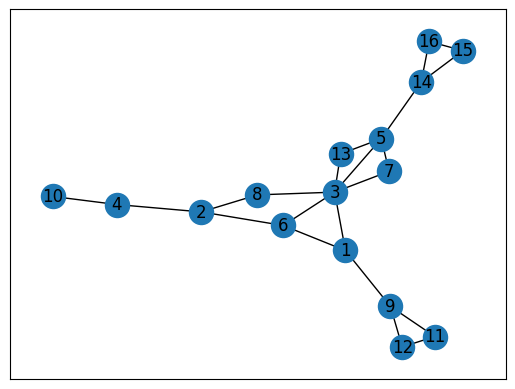

In [ ]:
import networkx as nx

G = nx.Graph()

G.add_node(1, back_par= 0)

G.add_edges_from([
    (1, 3), (3, 6), (3, 5), (5, 7), (5, 13), (6, 2), (2, 4), (4, 10), (2, 8), (1, 6),
    (1, 9), (9, 11), (11, 12), (12, 9), (3, 8), (7, 3), (13, 3), (5, 14), (14, 15), (15, 16), (16, 14)
])

nx.draw_networkx(G, with_labels=True)

In [ ]:
print("bridges: ", list(nx.algorithms.bridges(G)))
print("is_connected: ", nx.algorithms.is_connected(G))
print("is_bipartite: ", nx.is_bipartite(G))

bridges:  [(1, 9), (5, 14), (2, 4), (4, 10)]
is_connected:  True
is_bipartite:  False


In [ ]:
bridges = []
tree_edges = []
back_edges = []
visited = {n: False for n in G.nodes}
back_edge_start = {n: 0 for n in G.nodes}
back_edge_end = {n: 0 for n in G.nodes}
back_edge_over = {n: 0 for n in G.nodes}
tin = {n: -1 for n in G.nodes}

def dfs(G, source, parent, timer):

    if visited[source]:
      if tin[source] < tin[parent]:
        back_edge_end[source] += 1
        back_edge_start[parent] += 1
        back_edges.append((parent, source))
      return 0, timer

    visited[source] = True
    tin[source] = timer
    timer = timer+1
    if parent != -1:
      tree_edges.append((parent, source))
    num_back_edges = 0

    for v in G[source]:
      if v != parent:
       p, timer = dfs(G, v, source, timer)
       num_back_edges += p

    num_back_edges -= back_edge_end[source]
    num_back_edges += back_edge_start[source]

    if parent != -1 and num_back_edges == 0:
      bridges.append((parent, source))

    return num_back_edges, timer

timer = 0
dfs(G, 1, -1, timer)

(0, 16)

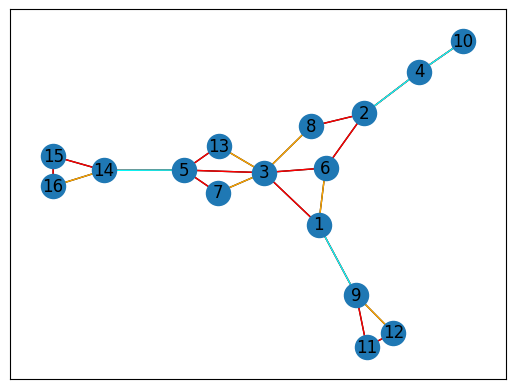

In [ ]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, G.edges)
nx.draw_networkx_edges(G, pos, tree_edges, edge_color="red")
nx.draw_networkx_edges(G, pos, back_edges, edge_color="orange")
nx.draw_networkx_edges(G, pos, bridges, edge_color="aqua")

In [ ]:
def dfs_bridges2(G):

  timer = 0
  visited = [False for _ in range(len(G.nodes) + 1)]
  tin = [-1 for _ in range(len(G.nodes) + 1)]
  tout = [-1 for _ in range(len(G.nodes) + 1)]
  tmin = [-1 for _ in range(len(G.nodes) + 1)]
  bridges = []

  def dfs1(source, parent):
    nonlocal timer

    if visited[source]:
      return

    tin[source] = timer
    tmin[source] = timer
    timer += 1

    visited[source] = True
    num_back_edges = 0

    for v in G[source]:
      if v != parent:
        dfs1(v, source)
        tmin[source] = min(tmin[source], tmin[v])

        if tmin[v] > tin[source]:
          bridges.append((source, v))

    timer += 1
    tout[source] = timer

  for u in G.nodes:
    if visited[u] == False:
      dfs1(u, -1)

  return bridges

bridges = dfs_bridges2(G)



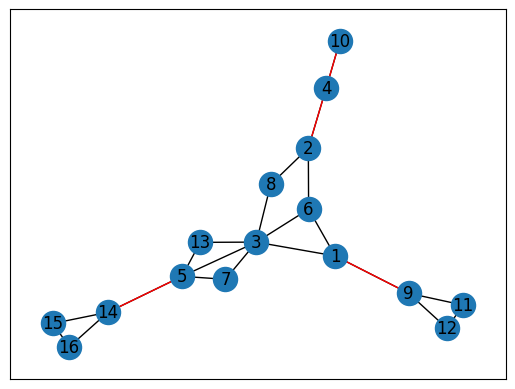

In [ ]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, G.edges, edge_color="black")
nx.draw_networkx_edges(G, pos, bridges, edge_color="red")

In [ ]:

def dfs_articulation_points(G):

  timer = 0
  visited = [False for _ in range(len(G.nodes) + 1)]
  tin = [-1 for _ in range(len(G.nodes) + 1)]
  tout = [-1 for _ in range(len(G.nodes) + 1)]
  tmin = [-1 for _ in range(len(G.nodes) + 1)]
  articulation_points = []

  def dfs1(source, parent):
    nonlocal timer

    if visited[source]:
      return

    is_articulation_point = False

    tin[source] = timer
    tmin[source] = timer
    timer += 1

    visited[source] = True
    num_back_edges = 0

    for v in G[source]:
      if v != parent:
        dfs1(v, source)
        tmin[source] = min(tmin[source], tmin[v])

        if tmin[v] >= tin[source]:
          is_articulation_point = True

    if is_articulation_point:
      articulation_points.append(source)

    timer += 1
    tout[source] = timer

  for u in G.nodes:
    if visited[u] == False:
      dfs1(u, -1)

  return articulation_points

art_points = dfs_articulation_points(G)
print(art_points)


[4, 2, 14, 5, 3, 9, 1]


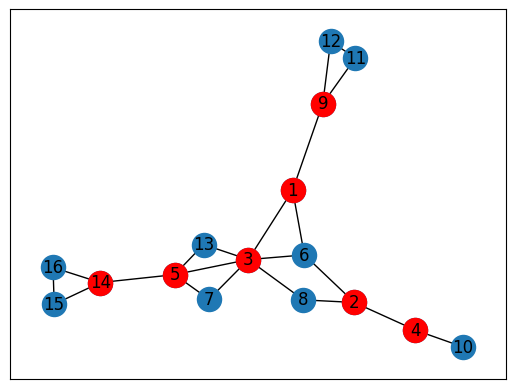

In [ ]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, G.edges, edge_color="black")
nx.draw_networkx_nodes(G, pos, art_points, node_color="red")